In [1]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#!  mamba install seaborn=0.9.0-y
#!  mamba install matplotlib=3.4.3-y
#!  mamba install statsmodels=0.12.0-y

In [2]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats

In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

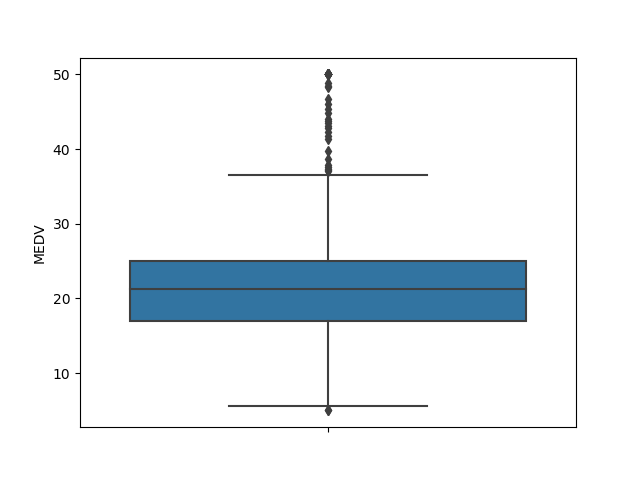

In [6]:
# creating a boxplot for the Median variable of owner-occupied homes

ax=sns.boxplot(y="MEDV", data=boston_df)
plt.show()

In [7]:
#The Median value for owner-occupied homes is around $20,000 with some outliers over $40,000

In [8]:
#Creating a bar chart of the Charles River Dummy Variable to compare the counts of the variable tract bounds ricver versus those otherwise. 

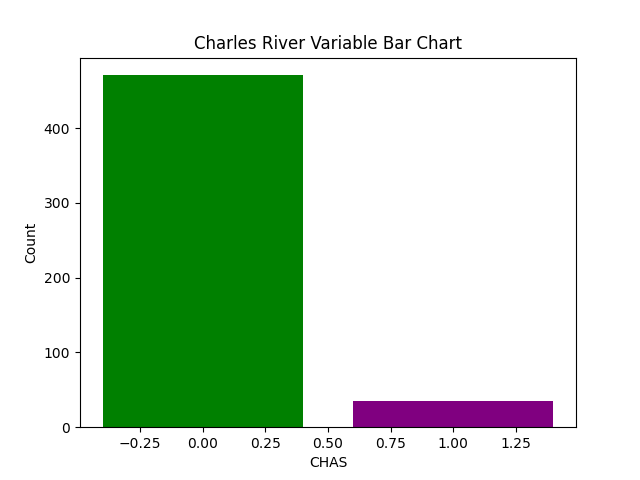

In [9]:
plt.bar(boston_df.CHAS.unique(),boston_df.CHAS.value_counts(),color=['green','purple'])
plt.xlabel('CHAS')
plt.ylabel('Count')
plt.title('Charles River Variable Bar Chart')
plt.show()

In [10]:
# Over 400 houses that aren't bound by the river compared to a count of less than 100 of houses with a tract that bounds the river

In [36]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

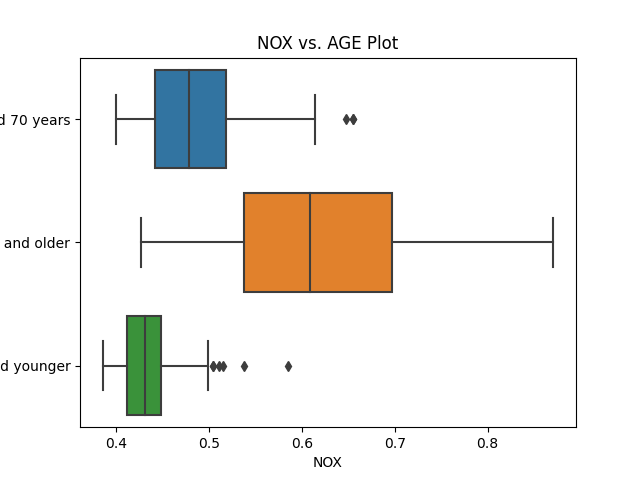

In [14]:
# Creating a box plot on the Median Value of owner-occupied homes(MEDV) and the AGE(proportion of owner-occupied unitsbuilt prior to 1940) seperated into age_groups

ax=sns.boxplot(x='NOX', y='age_group', data=boston_df)
plt.title('NOX vs. AGE Plot')
plt.show()

In [16]:
# There's a higher Nitric Oxide Concentration between 0.45-0.8 for all house proportions that are 75 years and older AGE variable.The Younger agegroup variables have less nitric oxide concentrations.

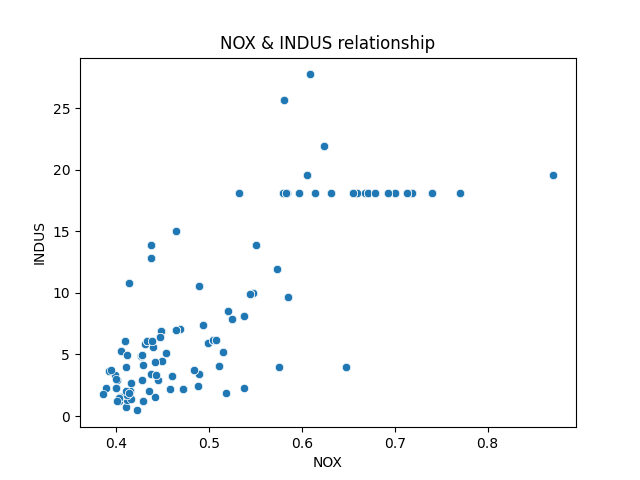

In [20]:
# Create a scatterplot showing the relationship between Nitric oxide concentrations(NOX) and Prportion to non-retail business acres per town(INDUS)

ax=sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('NOX & INDUS relationship')
plt.show()

In [21]:
# Most of the smaller non-retail business acres are located where there are lower amounts of Nitric Oxide Concentration. 

In [22]:
# Creating a histogram to describe the pupil-teacher ratio by town

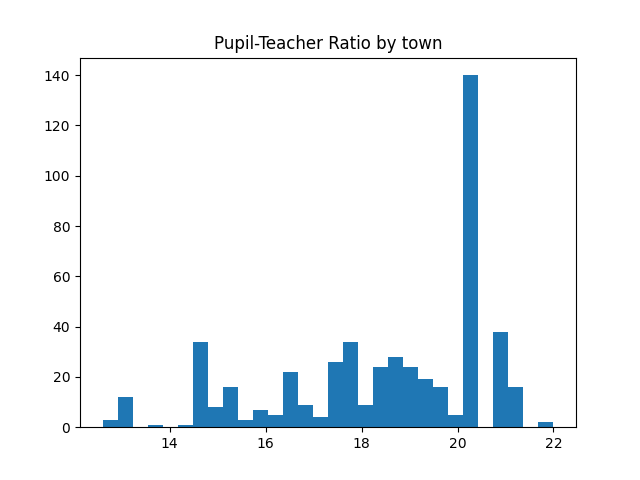

In [23]:
plt.hist(boston_df['PTRATIO'],30)
plt.title('Pupil-Teacher Ratio by town')
plt.show()

In [24]:
# The mean pupil-teacher ratio is between 16-20 where 20 has the highest ratio

In [ ]:
# Using a t-test to find out if there is a difference in the Median Value of owner-occupied homesMEDV) bound by CHarles River(CHAS)

My hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no significant difference in the Median value of owner-occupied homes bound by Charles River")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a significant difference in Median values for owner-occupied homes(MEDV) bound by Charles River")


In [29]:
#Using the Levemne's test to see if there is test significance

In [30]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.0032381193676398285)

In [31]:
# There are unequal variances since pvalue is less than 0.05

In [32]:
# Use the t-test to test our hypothesis

In [33]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [34]:
# We reject the hypothesis since the pvalue has e-05 which means less than the alpha(a) of 0.05.So, there is there is a difference in Median Values for owner-occupied homes(MEDV) bound by Charles River(CHAS)

In [35]:
# Using ANOVA to find out if there's a difference between Median value of owner-occupied houses(MEDV) for each proportion of owner-occupied units built prior to 1940(AGE)

My hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (there is no difference)
*   $H\_1:$ At least one of the proportions differ


In [36]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [37]:
# Checking for test significance

In [38]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [39]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [40]:
#Using the F-test to test ANOVA to find a possible difference in MEDV and AGE variables 

In [41]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [42]:
# We reject the hypothesis since we have a pvalue that is lower than 0.05. So at least one of the proportions differ from the Median values of houses

In [43]:
# Using Pearson Correlation to find out if there's a relationship between the Nitric oxides concentration(NOX) and the proportions of non-retail business acres per town (INDUS)

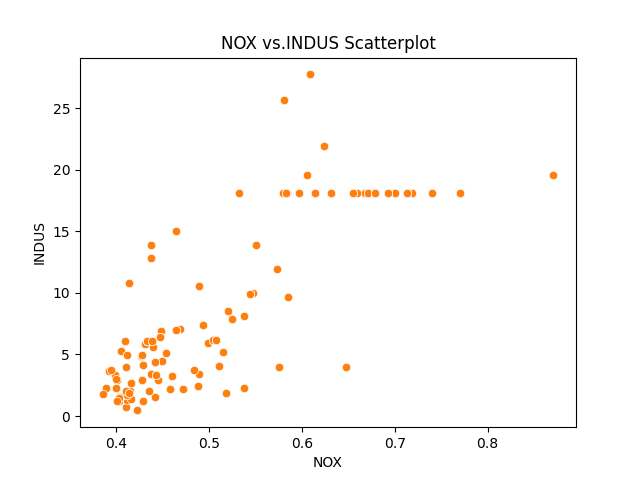

In [50]:
ax=sns.scatterplot(x="NOX",y="INDUS", data=boston_df)
plt.title('NOX vs.INDUS Scatterplot')
plt.show()

In [51]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209189, 7.913361061211254e-98)

In [52]:
# There is a relationship between Nitric Oxide and the proportion of non-retail business acres per town(INDUS).There are mostly Smaller proportionsof non-retail business acres that have a lower amount of nitric oxide

In [53]:
# Using the Regression Analysis to find out if there is an impact of additional weighted distance to five Boston employment centers

My hypothesis:

*   $H\_0: β1$ (There would be an impacton MEDV if there's additional DIS to the 5 Boston employment centers)
*   $H\_1: β1$ = (Additional DIS has no impact on MEDV)


In [54]:
## X is the input variables (or independent variables)
X = boston_df['MEDV']
## y is the target/dependent variable
y = boston_df['DIS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 19 May 2023   Prob (F-statistic):           1.21e-08
Time:                        12:45:06   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# The additional weighted distances to the 5 Boston Centers would impact the Median value of owner-occupied houses by .0572 marks